<div>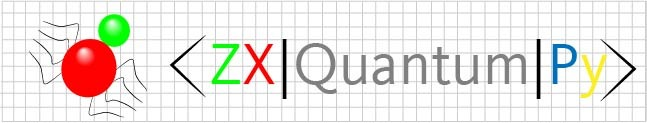</div>

# Grover's Algorithm
Welcome aboard!! 

In this section, we are going to consider the circuit of well-known Grover's algorithm which gives quantum advantages by solving unstructured search problems in $O\left(\sqrt{N}\right)$ time in comparison to classical one with $O(N)$ time. Here, we are considering two- and three- qubit cases and creating ZX-diagrams out of those circuits and simplifying those circuits using PyZX simplification strategies. For more details on Grover's algo please consider reading [Qiskit textbook](https://qiskit.org/textbook/ch-algorithms/grover.html#problems).

Before starting with the algorithm, please run the cell below to import qiskit and PyZX to our program.

In [1]:
from qiskit import QuantumCircuit  # importing QuantumCircuit from Qiskit
import pyzx as zx                  # importing pyZX

Grover's circuit consists of following elements:
- intialization
- performing Grover iteration, 
    which includes repeated application of
    - oracle
    - diffusion operator

### Example: 2 qubits

Let's start with the case of Grover's algorithm for $N=4$, which is realized with 2 qubits.
- **intialization**: which is done by applying hadamard operator on all the input qubits to create equal superposition
- **oracle**: which is also known as a black box, in this case we are considering marked state as $\left|{11}\right\rangle$, hence the oracle is simply the controlled-Z gate
- **diffusion operator**: this is soul of Grover's algorithm which increases the marked states amplitude while decreasing the amplitude of all other states


Let's now create a quantum circuit for the same using qiskit.

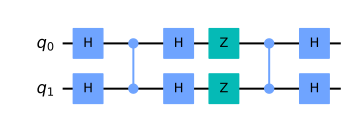

In [2]:
# For 2 qubits 
grover_circuit_Q2 = QuantumCircuit(2)
# initialization
grover_circuit_Q2.h([0,1])
# Oracle
grover_circuit_Q2.cz(0,1) 
# Diffusion operator (U_s)
grover_circuit_Q2.h([0,1])
grover_circuit_Q2.z([0,1])
grover_circuit_Q2.cz(0,1)
grover_circuit_Q2.h([0,1])
grover_circuit_Q2.draw(output='mpl')

Now, let's convert the above circuit to QASM format, which can further be converted to ZX-circuit and ZX-graph.

In [3]:
qasm_grover_2 = grover_circuit_Q2.qasm()          # converting quantum circuit to QASM
print(qasm_grover_2)                              # printing QASM code lines

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
h q[1];
cz q[0],q[1];
h q[0];
h q[1];
z q[0];
z q[1];
cz q[0],q[1];
h q[0];
h q[1];



Next we create a ZX-circuit from the above QASM code lines.

In [4]:
grover_circuit_2 = zx.qasm(qasm_grover_2)         # converting QASM to ZX-circuit
zx.draw(grover_circuit_2)                         # drawing the circuit

Before applying any simplification stratergy here, we have to convert the circuit to graph, for that we apply ```to_graph``` method and then print the stats of the graph, so that we can compare them after the simplification.

In [5]:
graph_grover_2 = grover_circuit_2.to_graph()      # converting ZX-circuit to ZX-graph
graph_grover_2                                    # printing ZX-graph stats

Graph(16 vertices, 16 edges)

Now, as we have ZX-graph at our hands, let's apply some simplification stratergies to our graph. First we are starting with ```spider_simp``` which is based on the spider-fusion rule, that means whenever he gave two spiders of same type adjacent to each other, we can fuse them together, and add their phases to form a single spider.

In [6]:
zx.simplify.spider_simp(graph_grover_2)           # spider simplification
zx.draw(graph_grover_2)                           # drawing the simplified graph
graph_grover_2                                    # printing ZX-graph stats

spider_simp: 3. 1. 2.  3 iterations


Graph(10 vertices, 10 edges)

Number of vertices and edges after the spider simplification reduces from 16 each to 10. Now, let's try to simplify the graph with ```full_reduce``` method, which further reduces the number of vertices and edges to 8 each.

In [7]:
zx.full_reduce(graph_grover_2, quiet=False)       # full_reduce simplification
zx.draw(graph_grover_2)                           # drawing the simplified graph
graph_grover_2                                    # printing ZX-graph stats

id_simp: 2.  1 iterations


Graph(8 vertices, 8 edges)

To verify that the simplified circuit is equivalent to the original one, we need to extract circuit from the simplified graph using ```extract_circuit``` method as 

In [8]:
grover_circuit_2_new = zx.extract_circuit(graph_grover_2) # extracts a circuit from a graph after simplification
zx.draw(grover_circuit_2_new)                             # draw the extracted circuit

To compare the original and simplified circuits, just feed the circuit objects directly to ```compare_tensors``` function as

In [9]:
zx.compare_tensors(grover_circuit_2,grover_circuit_2_new) # Returns True if grover_circuit and grover_circuit_opt implement the same circuit (up to global phase)

True

The another way to verify if both circuits represents the same is to use ```verify_equality``` method which composes the original circuit with the adjoint of simplified circuit, and tries to reduce it to the identity using ```full_reduce```. If successful it returns True, if not False.

In [10]:
grover_circuit_2.verify_equality(grover_circuit_2_new)    # Returns True if full_reduce() is able to reduce the composition of the circuits to the identity.

True

### Example: 3 qubits

Let's now implement Grover's algorithm for 3-qubits and searching for two marked states $\left|{101}\right\rangle$ and $\left|{110}\right\rangle$. The quantum circuit for the same is generated as follows using qiskit.

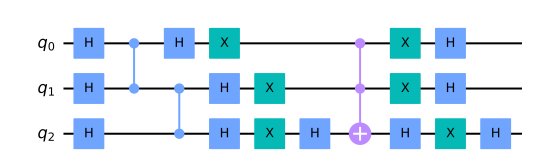

In [11]:
# for 3 qubits
grover_circuit_Q3 = QuantumCircuit(3)
# initialization
grover_circuit_Q3.h([0,1,2])
# Oracle
grover_circuit_Q3.cz(0,1)
grover_circuit_Q3.cz(1,2)
# Diffusion operator (U_s)
grover_circuit_Q3.h([0,1,2])
grover_circuit_Q3.x([0,1,2])
grover_circuit_Q3.h(2)
grover_circuit_Q3.mct([0,1],2)
grover_circuit_Q3.h(2)
grover_circuit_Q3.x([0,1,2])
grover_circuit_Q3.h([0,1,2])
grover_circuit_Q3.draw(output='mpl')        

Now, let's convert the above circuit to QASM format, which can further be converted to ZX-circuit and ZX-graph.

In [12]:
qasm_grover_3 = grover_circuit_Q3.qasm()          # converting quantum circuit to QASM
print(qasm_grover_3)                              # printing QASM code lines

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
h q[0];
h q[1];
h q[2];
cz q[0],q[1];
cz q[1],q[2];
h q[0];
h q[1];
h q[2];
x q[0];
x q[1];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
h q[2];
x q[0];
x q[1];
x q[2];
h q[0];
h q[1];
h q[2];



Next we will create a Zx-circuit from the above QASM code lines.

In [13]:
grover_circuit_3 = zx.qasm(qasm_grover_3)         # converting QASM to ZX-circuit
zx.draw(grover_circuit_3)                         # drawing the circuit

Now let's convert the circuit to graph using ```to_graph``` method and then print the stats of the graph, so that we can compare them after the simplification.

In [14]:
graph_grover_3 = grover_circuit_3.to_graph()      # converting ZX-circuit to ZX-graph
graph_grover_3                                    # printing ZX-graph stats

Graph(48 vertices, 53 edges)

Now, with ZX-graph at our hands, let's apply ```spider_simp``` as in 2-qubit case.

In [15]:
zx.simplify.spider_simp(graph_grover_3)           # spider simplification
zx.draw(graph_grover_3)                           # drawing the simplified graph
graph_grover_3                                    # printing ZX-graph stats

spider_simp: 5. 4. 2.  3 iterations


Graph(37 vertices, 42 edges)

Number of vertices(edges) after the spider simplification reduces from 48(53) to 37(42). Now, let's try to simplify the graph with ```full_reduce``` method, which further reduces the number of vertices(edges) to 23(31).

In [16]:
zx.full_reduce(graph_grover_3, quiet=False)       # full_reduce simplification
graph_grover_3.normalize()                        # for compact visuals
zx.draw(graph_grover_3)                           # drawing the simplified graph
graph_grover_3                                    # printing ZX-graph stats

id_simp: 8. 2.  2 iterations
spider_simp: 2. 1. 1.  3 iterations
pivot_gadget_simp: 3. 1.  2 iterations


Graph(23 vertices, 29 edges)

After this simplification procedure, our ZX-graph no longer looks like a circuit. In order to get a circuit from the above graph, we have to extract it as discussed in previous notebooks using ``extract_circuit`` method. 

In [17]:
grover_circuit_3_new = zx.extract_circuit(graph_grover_3)  # extracts a circuit from a graph after simplification
zx.draw(grover_circuit_3_new)                              # draw the extracted circuit   

To compare the original and simplified circuits, just feed the circuit objects directly to ```compare_tensors``` function as

In [18]:
zx.compare_tensors(grover_circuit_3,grover_circuit_3_new)  # Returns True if grover_circuit and grover_circuit_opt implement the same circuit (up to global phase)

True

Now, let's verify the above again using ```verify_equality``` method as

In [19]:
grover_circuit_3_new.verify_equality(grover_circuit_3)   # Returns True if full_reduce() is able to reduce the composition of the circuits to the identity.

True